In [1]:
import pandas as pd
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile
import missingno as msno
import seaborn as sns
import graphviz
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV




In [2]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')

# Data Exploration

In [3]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df.loc[df.duplicated(subset=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'])].head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0


In [8]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [9]:
df.loc[df.blood_glucose_level >=300,].head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
94,Female,60.0,0,0,never,27.32,7.5,300,1
142,Female,80.0,0,0,former,21.97,7.0,300,1
199,Female,43.0,0,0,never,26.71,6.5,300,1
746,Male,62.0,0,0,not current,32.19,5.8,300,1
936,Male,49.0,0,0,never,27.32,6.5,300,1


*people who have high glucose levels have more ability to have self degree of diabetes*

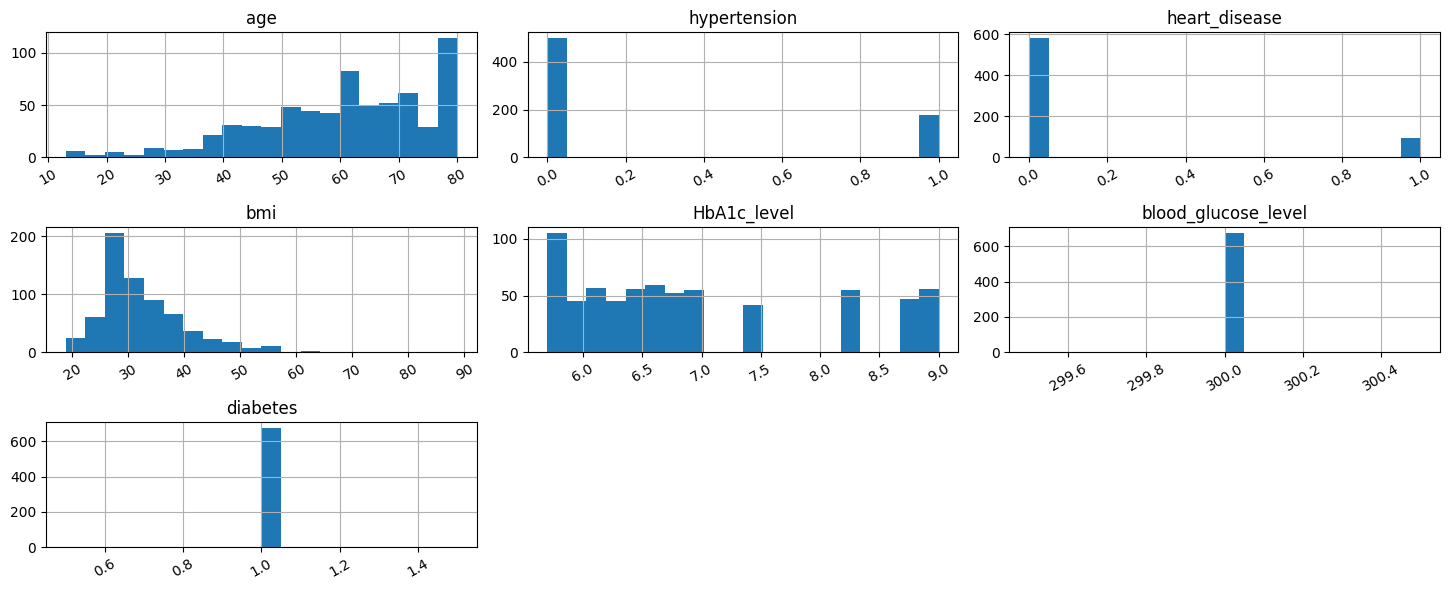

In [10]:
df.loc[df.blood_glucose_level >=300].hist(bins=20,figsize=(14.6,6),xrot=30)
plt.tight_layout()
plt.show()


# Select Best Features.

In [11]:
corr=df.corr()

<ipython-input-11-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [12]:
corr.iloc[0:5,0:5]

,age,hypertension,heart_disease,bmi,HbA1c_level
age,1.000000,0.251171,0.233354,0.337396,0.101354
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589
bmi,0.337396,0.147666,0.061198,1.000000,0.082997
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000


<Axes: >

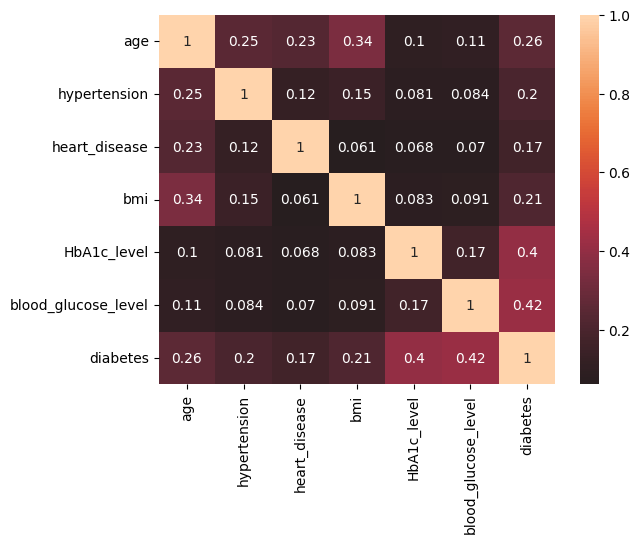

In [13]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,center=0,annot=True)

In [14]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
itens_to_remove=['smoking_history','gender']

In [16]:
feature_to_response=df.columns.tolist()

In [17]:
feature_to_response=[item for item in feature_to_response if item not in itens_to_remove]

In [18]:
feature_to_response

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [19]:
X=df[feature_to_response].iloc[:,:-1].values
Y=df[feature_to_response].iloc[:,-1].values

In [20]:
print(X.shape,Y.shape)

(100000, 6) (100000,)


In [21]:
[f_static,_p_value]=f_classif(X,Y)

In [22]:
best_sict=pd.DataFrame({'Feature':feature_to_response[:-1],'F_static':f_static,'P_value':_p_value})

In [23]:
best_sict[['Feature','F_static','P_value']]

,Feature,F_static,P_value
0,age,7131.405852,0.0
1,hypertension,4072.706875,0.0
2,heart_disease,3038.559564,0.0
3,bmi,4816.113932,0.0
4,HbA1c_level,19122.211184,0.0
5,blood_glucose_level,21363.054361,0.0


In [24]:
selector=SelectPercentile(f_classif,percentile=30)

In [25]:
selector.fit(X,Y)

SelectPercentile(percentile=30)

In [26]:
best_itrx=selector.get_support()

In [27]:
best_itrx

array([False, False, False, False,  True,  True])

In [28]:
features=feature_to_response[:-1]

In [29]:
best_itrx=[features[counter] for counter in range(len(features)) if best_itrx[counter]]

In [30]:
best_itrx

['HbA1c_level', 'blood_glucose_level']

# Training The model

In [31]:
X_train,X_test,y_train,y_test=train_test_split(df['HbA1c_level'].values.reshape(-1,1),df['diabetes'].values,
                                               test_size=0.2,random_state=24
                                               )

In [32]:
print(np.mean(y_test))

0.084


In [33]:
y=np.mean(df['diabetes'])

In [34]:
x=np.mean(df['diabetes']==0)

In [35]:
x-y

0.8300000000000001

In [36]:
C_vales_exponente=np.linspace(-3,3,10)
vals_expo=np.float(10)**C_vales_exponente
vals_expo=list(vals_expo)

<ipython-input-36-25dfff9cd4e0>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vals_expo=np.float(10)**C_vales_exponente


In [37]:
Alist=[]

In [38]:
for line in range(len(vals_expo)):
  Alist.append(vals_expo[line])


Alist=list(Alist)
len(Alist)

10

In [39]:
Alist

[0.001,
 0.004641588833612777,
 0.021544346900318832,
 0.1,
 0.46415888336127775,
 2.154434690031882,
 10.0,
 46.41588833612773,
 215.44346900318823,
 1000.0]

In [40]:
j=0
for i in Alist:
  j=random.choice(Alist)


In [41]:
new_lr=LogisticRegression(solver='saga',penalty='l1',C=j,max_iter=100,verbose=1)

In [42]:
new_lr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 12 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=0.001, penalty='l1', solver='saga', verbose=1)

In [43]:
y_pred=new_lr.predict(X_test)

In [44]:
is_correct=y_pred==y_test

# Accuracy

In [45]:
np.mean(is_correct)

0.94425

# Confusion Matrix

In [46]:
metrics.confusion_matrix(y_pred,y_test)

array([[18320,  1115],
       [    0,   565]])

In [47]:
y_pred_proba=new_lr.predict_proba(X_test)
y_pred_proba

array([[0.94526719, 0.05473281],
       [0.99879223, 0.00120777],
       [0.81807296, 0.18192704],
       ...,
       [0.95334566, 0.04665434],
       [0.99720392, 0.00279608],
       [0.92501971, 0.07498029]])

In [48]:
y_pred_sum=np.sum(y_pred_proba,1)
y_pred_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [49]:
y_pred_proba_features=metrics.roc_auc_score(y_test,y_pred_proba[:,1])

In [50]:
y_pred_proba_features

0.8480346095861926

# Testing The Roc-Curve

In [51]:
tpr,fpr,thresolds=metrics.roc_curve(y_test,y_pred_proba[:,1])

Text(0.5, 1.0, 'Roc Curve')

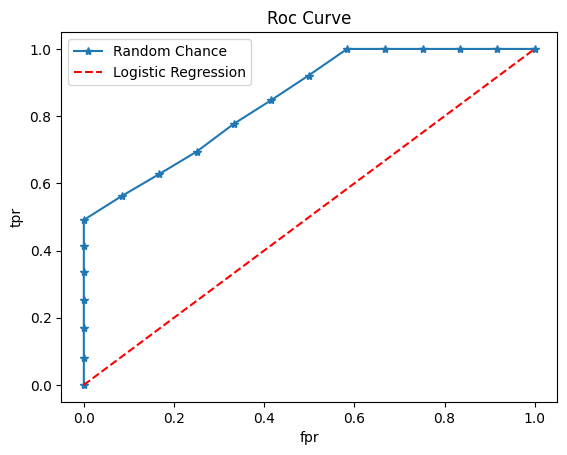

In [52]:
plt.plot(tpr,fpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(['Random Chance','Logistic Regression'])
plt.title('Roc Curve')

In [53]:
precision,recall,thresh=metrics.precision_recall_curve(y_test,y_pred_proba[:,1])

In [54]:
metrics.auc(recall,precision)

0.6259324004896829

In [55]:
C_vals={'C':[0.00001,
 0.004641588833612777,
 0.021544346900318832,
 0.1,
 0.46415888336127775,
 2.154434690031882]}

In [56]:
rf=GridSearchCV(new_lr,param_grid=C_vals,refit=True,return_train_score=True,error_score=np.nan,cv=4,scoring='accuracy')


In [57]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 12 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 1 seconds
convergence after 12 epochs took 0 seconds
convergence after 7 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 12 epochs took 0 seconds
convergence after 10 epochs took 0 seconds
convergence after 12 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 11 epochs took 0 seconds
convergence after 12 epochs took 0 seconds
convergence after 10 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8 epochs took 0 seconds
convergence after 7 epochs took 1 seconds
convergence after 12 epochs took 0 seconds
convergence after 13 epochs took 0 seconds
convergence after 6 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 6 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 14 epochs took 0 seconds
convergence after 13 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


GridSearchCV(cv=4,
             estimator=LogisticRegression(C=0.001, penalty='l1', solver='saga',
                                          verbose=1),
             param_grid={'C': [1e-05, 0.004641588833612777,
                               0.021544346900318832, 0.1, 0.46415888336127775,
                               2.154434690031882]},
             return_train_score=True, scoring='accuracy')

In [58]:
rf_results=pd.DataFrame(rf.cv_results_)

In [59]:
rf.best_score_, rf.best_params_

(0.9404250000000001, {'C': 0.004641588833612777})

In [60]:
Importances=pd.DataFrame({'Features':feature_to_response[:-1],'Importances':rf.best_estimator_})

In [61]:
Importances[['Features','Importances']].head(5)

,Features,Importances
0,age,"LogisticRegression(C=0.004641588833612777, pen..."
1,hypertension,"LogisticRegression(C=0.004641588833612777, pen..."
2,heart_disease,"LogisticRegression(C=0.004641588833612777, pen..."
3,bmi,"LogisticRegression(C=0.004641588833612777, pen..."
4,HbA1c_level,"LogisticRegression(C=0.004641588833612777, pen..."


Text(0.5, 0, 'Valuer of C')

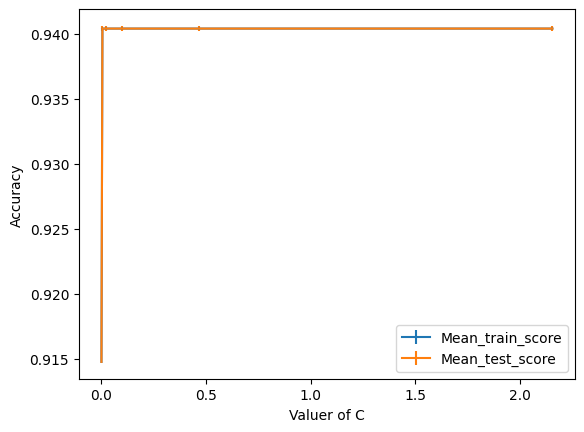

In [62]:
axes=plt.axes()
axes.errorbar(rf_results['param_C'],rf_results['mean_train_score'],yerr=rf_results['std_train_score'],label='Mean_train_score')
axes.errorbar(rf_results['param_C'],rf_results['mean_test_score'],yerr=rf_results['std_test_score'],label='Mean_test_score')
plt.legend()
axes.set_ylabel('Accuracy')
axes.set_xlabel('Valuer of C')

# Cross-Validation / GridSearch

In [63]:
k_folds=KFold(n_splits=4,shuffle=True,random_state=1)

In [64]:
test_score_reggression=cross_validate(rf,X_train,y_train,cv=k_folds,return_train_score=True,verbose=0,scoring='accuracy',n_jobs=-1,error_score=np.nan,
                                     return_estimator=True)

In [65]:
test_total_score=np.mean(test_score_reggression['test_score'])

In [66]:
test_total_score

0.940425

# Saving The Model Using LogisticRegression-Classifier

In [67]:
df1=df[feature_to_response].copy